# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [4]:
%matplotlib inline

# Import data

In [6]:
path = '/Users/zoegyftopoulos/Documents/Data Projects/08-2024 World Happiness Report'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_imputed.csv'))

# Check and prepare data for k-means

In [9]:
df.head()

,Unnamed: 0,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
0,0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [10]:
# Drop unneeded columns
df_k = df.drop(columns = ['Unnamed: 0', 'country', 'region', 'happiness_rank', 'year'])

In [11]:
df_k.head()

,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [12]:
df_k.shape

(782, 7)

In [13]:
df_k.isnull().sum()

happiness_score       0
gdp_per_capita        0
family                0
health_life_exp       0
freedom               0
perc_of_corruption    0
generosity            0
dtype: int64

In [14]:
df_k[df_k.duplicated()]

,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity


# Elbow technique

In [16]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] 
score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-1294.043117967738,
 -488.9839132437761,
 -306.97261018586914,
 -237.60500790071387,
 -194.73159835470406,
 -177.3043062067187,
 -163.01169936757884,
 -152.32973737389048,
 -144.5468107185984]

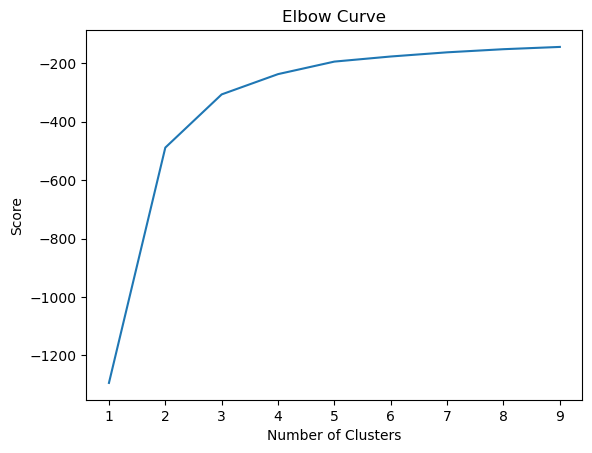

In [18]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As we have to select the value of k at the "elbow", i.e. the point after which the distortion starts decreasing in a linear fashion, I conclude that the optimal number of clusters for the data is 4.

# k-means clustering

In [21]:
kmeans = KMeans(n_clusters = 4) 

In [22]:
kmeans.fit(df_k)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
df_k['clusters'] = kmeans.fit_predict(df_k)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_k.head()

,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [43]:
df_k['clusters'].value_counts()

clusters
3    240
1    234
2    180
0    128
Name: count, dtype: int64

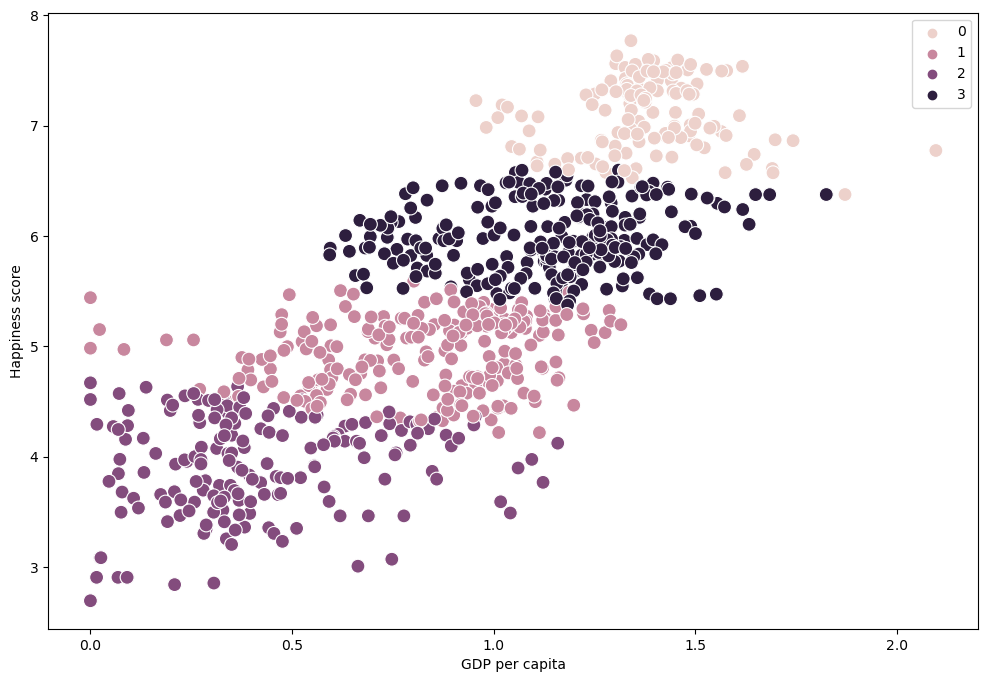

In [45]:
# Plot the clusters for the "gdp_per_capita" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['gdp_per_capita'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Happiness score') 
plt.show()

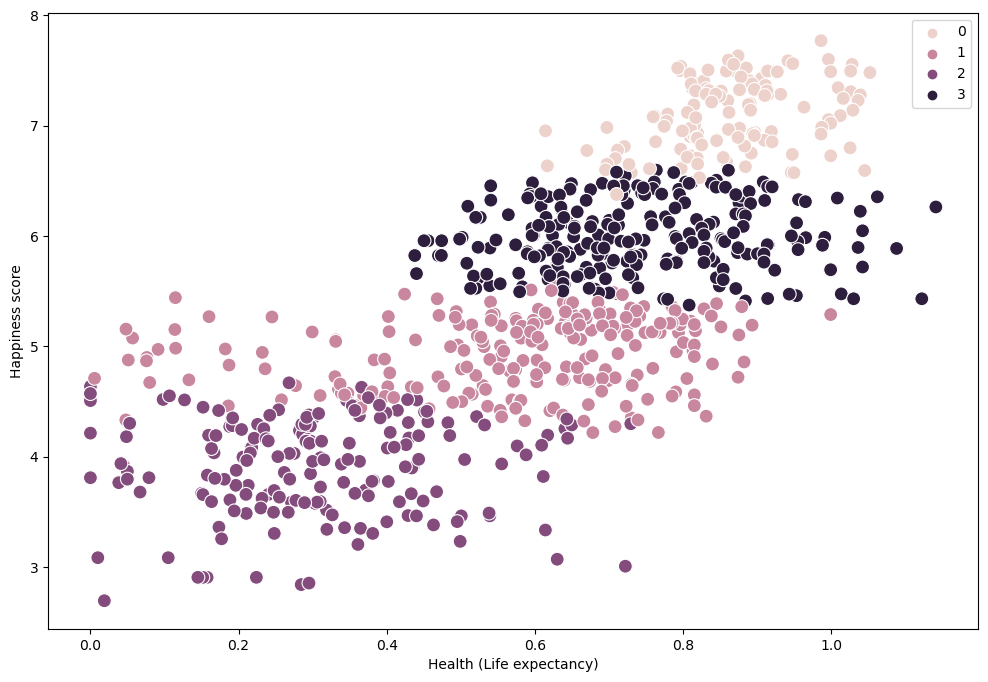

In [47]:
# Plot the clusters for the "health_life_exp" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['health_life_exp'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Health (Life expectancy)') 
plt.ylabel('Happiness score') 
plt.show()

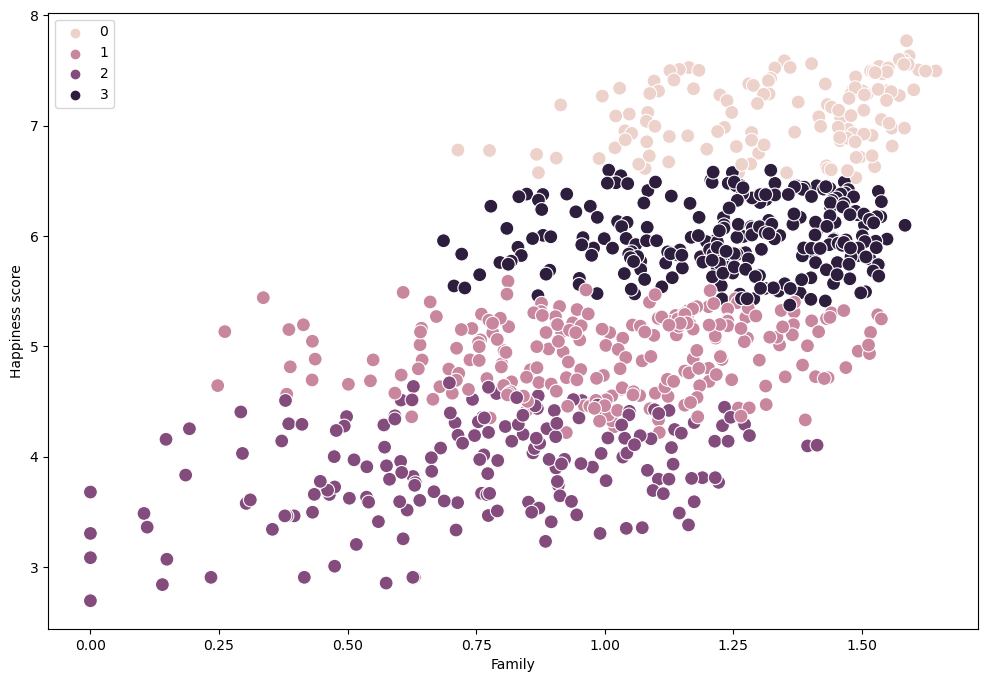

In [49]:
# Plot the clusters for the "family" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['family'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Family') 
plt.ylabel('Happiness score') 
plt.show()

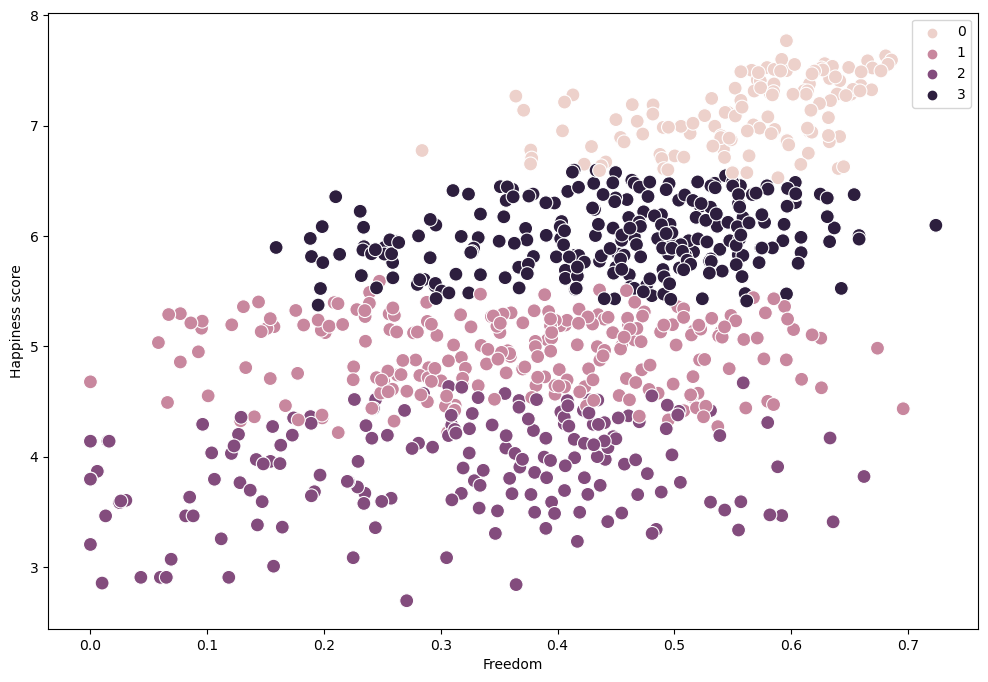

In [51]:
# Plot the clusters for the "freedom" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['freedom'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Happiness score') 
plt.show()

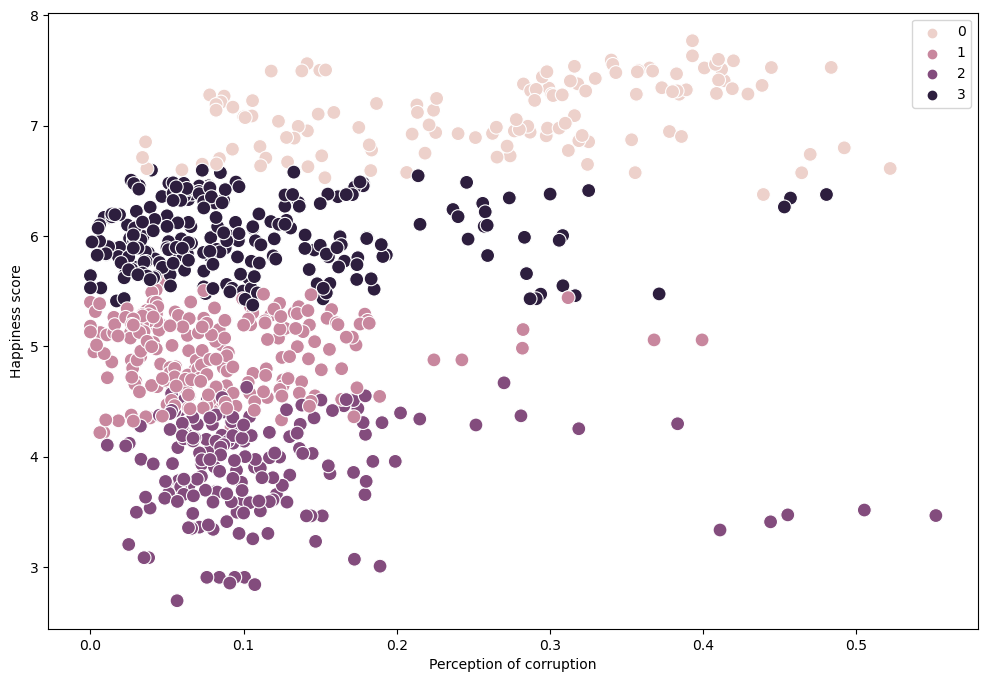

In [53]:
# Plot the clusters for the "perc_of_corruption" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['perc_of_corruption'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Perception of corruption') 
plt.ylabel('Happiness score') 
plt.show()

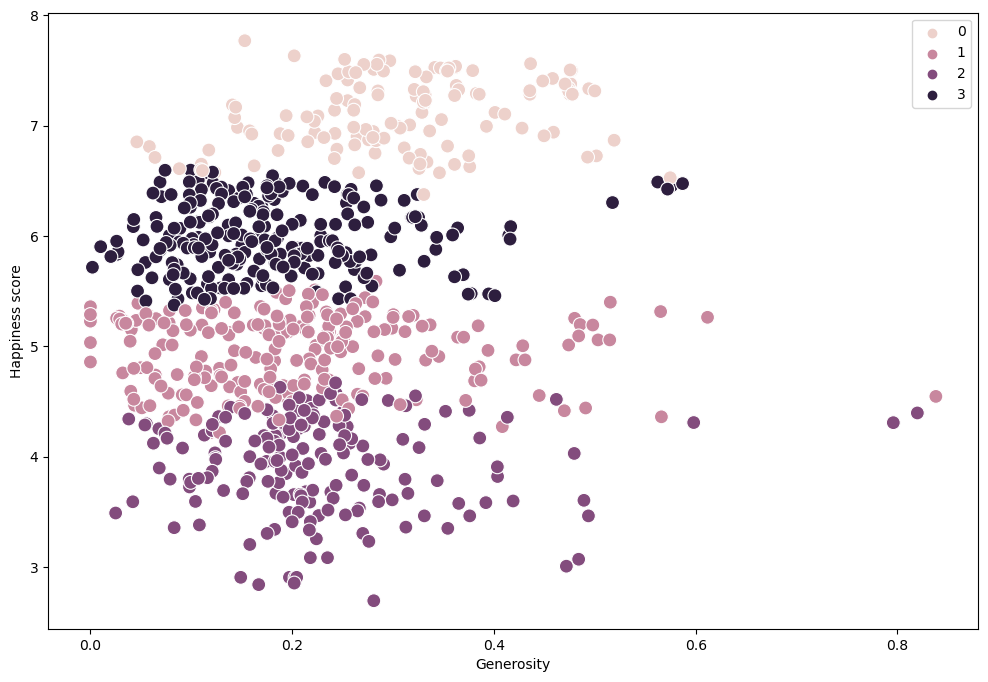

In [55]:
# Plot the clusters for the "generosity" and "happiness_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['generosity'], y=df_k['happiness_score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness score') 
plt.show()

As we can see from the scatter plots, the clusters seem to represent four groups based on their happiness levels. As especially the factors GDP, health and family are positively correlated to the happiness score, it is visible in the scatter plots that the clusters also define low/high levels of these traits.

In [58]:
df_k.columns

Index(['happiness_score', 'gdp_per_capita', 'family', 'health_life_exp',
       'freedom', 'perc_of_corruption', 'generosity', 'clusters'],
      dtype='object')

In [62]:
df_k.groupby('clusters').agg({'gdp_per_capita':['mean', 'median'], 
                         'family':['mean', 'median'], 
                         'health_life_exp':['mean', 'median'],
                         'freedom':['mean', 'median'],
                         'perc_of_corruption':['mean', 'median'],
                         'generosity':['mean', 'median'],
                         'happiness_score':['mean', 'median']})

gdp_per_capita              family           health_life_exp  \
                   mean    median      mean    median            mean   
clusters                                                                
0              1.378819  1.372500  1.338142  1.418162        0.863490   
1              0.827636  0.888060  1.014025  1.028130        0.577910   
2              0.415841  0.357500  0.756802  0.774080        0.309806   
3              1.130591  1.157779  1.243810  1.269495        0.739109   

                     freedom           perc_of_corruption            \
            median      mean    median               mean    median   
clusters                                                              
0         0.860635  0.560422  0.576705           0.263719  0.287201   
1         0.605855  0.366132  0.381000           0.082882  0.071548   
2         0.297330  0.315960  0.340192           0.111859  0.092113   
3         0.724430  0.446631  0.462995           0.104134  0.078785   

         generosity           happiness_score          
               mean    median            mean  median  
clusters                                               
0          0.304809  0.305760        7.101086  7.0970  
1          0.202088  0.187000        4.940009  4.9960  
2          0.228247  0.209350        3.916461  3.9715  
3          0.181407  0.164465        5.985533  5.9615

The results show that the means/medians of most variables are highest for cluster 0, followed by cluster 3, 1 and 2. This order could also be seen in the scatter plots. The results could be useful for future steps of analysis when we want to compare these different groups with each other. 